# Training simple neural networks on the MNIST dataset using keras

You can create a suitable conda environment to run this notebook using:

    conda create -n keras_demo python=3 tensorflow matplotlib ipykernel scikit-learn pandas
    
If you haven't got the latest cuda drivers, you may also need to specify `cudatoolkit=9.0` or similar.

### First some common imports...

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

### Set up TensorFlow in a friendly manner

In [2]:
import tensorflow as tf

# if multiple GPUs, only use one of them 
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

# avoid hogging all the GPU memory
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

In [3]:
# check that we have the devices we expect available
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7523402726697974993, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10903142400
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17001153544636143689
 physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:07:00.0, compute capability: 6.1"]

### Import keras bits and pieces

In [4]:
# if you have a recent version of tensorflow, keras is included
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

### We will use a standard demonstration data set: MNIST handwritten digits

In [5]:
# the data, split between train and test sets
(x_train, y_train), (x_valtest, y_valtest) = mnist.load_data()

In [6]:
# demo the effect of noisy data
#x_train = (x_train/5 + np.random.poisson(200, size=x_train.shape)).clip(0, 255)
#x_valtest = (x_valtest/5 + np.random.poisson(200, size=x_valtest.shape)).clip(0, 255)

In [7]:
# if we wanted to test our model on limited data,
# we could reduce the amount of training data like this...
idx = np.random.choice(len(x_train), size=len(x_train)//100)
x_train = x_train[idx]
y_train = y_train[idx]

If your data isn't split, or want a validation set, need to do split manually

In [8]:
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_valtest, y_valtest, test_size=0.5)

In [9]:
x_train.shape, y_train.shape

((600, 28, 28), (600,))

In [10]:
x_test.shape, y_test.shape

((5000, 28, 28), (5000,))

In [11]:
x_val.shape, y_val.shape

((5000, 28, 28), (5000,))

### Take a look at the data

This is a very quick glance - you should carefully examine any new dataset

class = 6


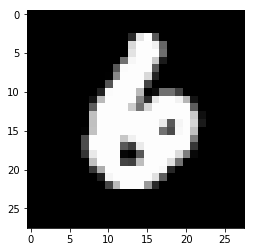

In [12]:
i = 3
plt.imshow(x_train[i], cmap='gray')
print('class =', y_train[i])

### Prepare the data

In [13]:
# convert class vectors to "one-hot" binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [14]:
y_train[i]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [15]:
def process_data(x):
    x = x.reshape(-1, 784)
    x = x.astype('float32')
    x /= 255
    return x

In [16]:
x_train = process_data(x_train)
x_test = process_data(x_test)
x_val = process_data(x_val)

In [17]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_val.shape[0], 'validation samples')

600 train samples
5000 test samples
5000 validation samples


## Fully-connected NN

### Construct the network

In [18]:
# a fairly small network for speed
fcmodel = Sequential()
fcmodel.add(Dense(32, activation='relu', input_shape=(784,)))
fcmodel.add(Dense(32, activation='relu'))
# could include dropout, regularisation, ...
fcmodel.add(Dense(num_classes, activation='softmax'))

In [19]:
fcmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [20]:
fcmodel.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(),
                metrics=['accuracy'])

### Train the network

In [21]:
batch_size = 32
epochs = 50

In [22]:
history = fcmodel.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=2,
                      validation_data=(x_test, y_test))

Train on 600 samples, validate on 5000 samples
Epoch 1/50
 - 1s - loss: 2.0637 - acc: 0.3483 - val_loss: 1.7996 - val_acc: 0.5368
Epoch 2/50
 - 0s - loss: 1.5774 - acc: 0.6067 - val_loss: 1.4344 - val_acc: 0.6654
Epoch 3/50
 - 0s - loss: 1.2276 - acc: 0.6933 - val_loss: 1.1661 - val_acc: 0.7062
Epoch 4/50
 - 0s - loss: 0.9801 - acc: 0.7783 - val_loss: 0.9583 - val_acc: 0.7556
Epoch 5/50
 - 0s - loss: 0.7660 - acc: 0.8300 - val_loss: 0.7892 - val_acc: 0.7922
Epoch 6/50
 - 1s - loss: 0.5974 - acc: 0.8783 - val_loss: 0.6783 - val_acc: 0.8226
Epoch 7/50
 - 1s - loss: 0.4878 - acc: 0.9083 - val_loss: 0.5936 - val_acc: 0.8394
Epoch 8/50
 - 0s - loss: 0.4055 - acc: 0.9183 - val_loss: 0.5620 - val_acc: 0.8486
Epoch 9/50
 - 0s - loss: 0.3460 - acc: 0.9400 - val_loss: 0.5208 - val_acc: 0.8538
Epoch 10/50
 - 0s - loss: 0.2965 - acc: 0.9400 - val_loss: 0.4877 - val_acc: 0.8612
Epoch 11/50
 - 0s - loss: 0.2552 - acc: 0.9483 - val_loss: 0.4849 - val_acc: 0.8610
Epoch 12/50
 - 0s - loss: 0.2236 - acc

In [23]:
score = fcmodel.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8039847173077985
Test accuracy: 0.8684


In [24]:
# really we should not look at the score for this set of data
# until we have finished tuning our model
score = fcmodel.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7418088316336274
Test accuracy: 0.871


In [25]:
def histplot(history):
    hist = pd.DataFrame(history.history)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    hist.plot(y=['loss', 'val_loss'], ax=ax1)
    min_loss = hist['val_loss'].min()
    ax1.hlines(min_loss, 0, len(hist), linestyle='dotted',
               label='min(val_loss) = {:.3f}'.format(min_loss))
    ax1.legend(loc='upper right')
    hist.plot(y=['acc', 'val_acc'], ax=ax2)
    max_acc = hist['val_acc'].max()
    ax2.hlines(max_acc, 0, len(hist), linestyle='dotted',
               label='max(val_acc) = {:.3f}'.format(max_acc))
    ax2.legend(loc='lower right', fontsize='large')

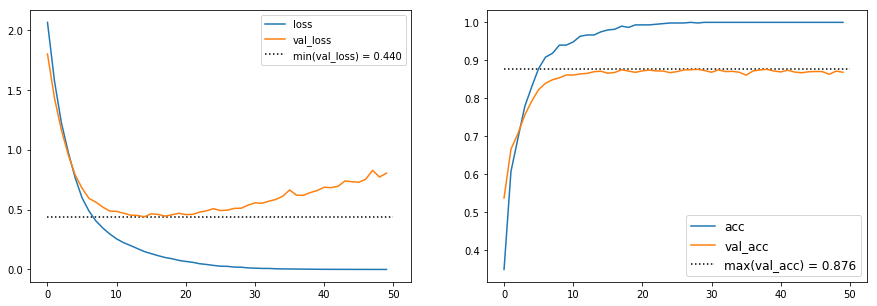

In [26]:
histplot(history)

## Convolutional Neural Network (CNN)

### Reshape the data

In [27]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

### Construct the network

In [28]:
# a fairly small network for speed
cnnmodel = Sequential()
cnnmodel.add(Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnnmodel.add(MaxPooling2D((3, 3)))
cnnmodel.add(Conv2D(16, (3, 3), activation='relu'))
cnnmodel.add(MaxPooling2D((2, 2)))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(num_classes, activation='softmax'))
# could include dropout, regularisation, ...

In [29]:
cnnmodel.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(),
                metrics=['accuracy'])

In [30]:
cnnmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 16)          1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1450      
Total params: 2,698
Trainable params: 2,698
Non-trainable params: 0
_________________________________________________________________


In [31]:
# save weights for reinitialising below
cnnmodel.save_weights('/tmp/cnnmodel_init_weights.tf')


Consider using a TensorFlow optimizer from `tf.train`.


### Train the network

In [32]:
history = cnnmodel.fit(x_train, y_train,
                       batch_size=batch_size, 
                       epochs=3*epochs,
                       verbose=2,
                       validation_data=(x_test, y_test))

Train on 600 samples, validate on 5000 samples
Epoch 1/150
 - 2s - loss: 2.2625 - acc: 0.1533 - val_loss: 2.2041 - val_acc: 0.2552
Epoch 2/150
 - 1s - loss: 2.1362 - acc: 0.3467 - val_loss: 2.0669 - val_acc: 0.4164
Epoch 3/150
 - 1s - loss: 1.9653 - acc: 0.5217 - val_loss: 1.8720 - val_acc: 0.5170
Epoch 4/150
 - 0s - loss: 1.7305 - acc: 0.6000 - val_loss: 1.6147 - val_acc: 0.6706
Epoch 5/150
 - 0s - loss: 1.4768 - acc: 0.6917 - val_loss: 1.3634 - val_acc: 0.7144
Epoch 6/150
 - 1s - loss: 1.2326 - acc: 0.7300 - val_loss: 1.1375 - val_acc: 0.7560
Epoch 7/150
 - 1s - loss: 1.0206 - acc: 0.7783 - val_loss: 0.9437 - val_acc: 0.7830
Epoch 8/150
 - 1s - loss: 0.8502 - acc: 0.7800 - val_loss: 0.7996 - val_acc: 0.8064
Epoch 9/150
 - 1s - loss: 0.7298 - acc: 0.8217 - val_loss: 0.6915 - val_acc: 0.8246
Epoch 10/150
 - 1s - loss: 0.6398 - acc: 0.8383 - val_loss: 0.6273 - val_acc: 0.8316
Epoch 11/150
 - 1s - loss: 0.5670 - acc: 0.8533 - val_loss: 0.5588 - val_acc: 0.8508
Epoch 12/150
 - 1s - loss: 

Epoch 97/150
 - 1s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.2813 - val_acc: 0.9378
Epoch 98/150
 - 1s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.2813 - val_acc: 0.9382
Epoch 99/150
 - 1s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.2894 - val_acc: 0.9380
Epoch 100/150
 - 1s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.2860 - val_acc: 0.9370
Epoch 101/150
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.2886 - val_acc: 0.9364
Epoch 102/150
 - 0s - loss: 9.7953e-04 - acc: 1.0000 - val_loss: 0.2995 - val_acc: 0.9368
Epoch 103/150
 - 0s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.3238 - val_acc: 0.9318
Epoch 104/150
 - 0s - loss: 9.7872e-04 - acc: 1.0000 - val_loss: 0.3005 - val_acc: 0.9366
Epoch 105/150
 - 0s - loss: 8.8567e-04 - acc: 1.0000 - val_loss: 0.3012 - val_acc: 0.9392
Epoch 106/150
 - 0s - loss: 0.0010 - acc: 1.0000 - val_loss: 0.2925 - val_acc: 0.9348
Epoch 107/150
 - 0s - loss: 7.3574e-04 - acc: 1.0000 - val_loss: 0.2846 - val_acc: 0.9374
Epoch 108/150
 - 0s - loss: 6.3517e-04 - 

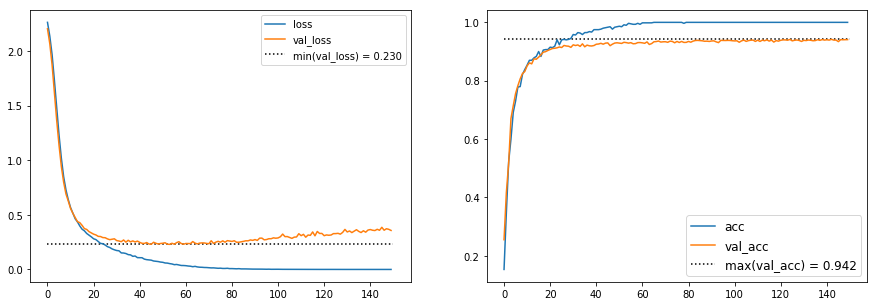

In [33]:
histplot(history)

## Online data augmentation

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=20.0,
    zoom_range=0.05)

#datagen.fit(x_train)  # only required if normalizing

In [35]:
gen = datagen.flow(x_train, y_train, batch_size=1)

label = 4


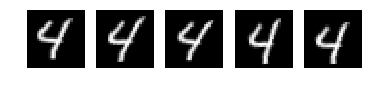

In [36]:
# run this several times to see more augmented examples
i = 3
fig, axarr = plt.subplots(1, 5)
for ax in axarr:
    img = gen[i][0][0, : , :, 0]
    ax.imshow(img, cmap='gray');
    ax.axis('off')
print('label =', gen[i][1][0].argmax())

In [37]:
# Reinitialise model
cnnmodel.load_weights('/tmp/cnnmodel_init_weights.tf')

In [38]:
cnnmodel.compile(loss='categorical_crossentropy',
                 optimizer=RMSprop(),
                 metrics=['accuracy'])

In [39]:
# fits the model on batches with real-time data augmentation:
# the accuracy continues to (slowly) rise, due to the augmentation
history = cnnmodel.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), 
                                 epochs=10*epochs,
                                 verbose=2,
                                 validation_data=(x_test, y_test))

Epoch 1/500
 - 2s - loss: 2.2715 - acc: 0.1618 - val_loss: 2.2166 - val_acc: 0.2282
Epoch 2/500
 - 1s - loss: 2.1789 - acc: 0.3180 - val_loss: 2.0932 - val_acc: 0.3650
Epoch 3/500
 - 1s - loss: 2.0585 - acc: 0.4265 - val_loss: 1.9140 - val_acc: 0.5134
Epoch 4/500
 - 1s - loss: 1.8751 - acc: 0.5399 - val_loss: 1.7001 - val_acc: 0.5750
Epoch 5/500
 - 1s - loss: 1.6891 - acc: 0.5669 - val_loss: 1.4584 - val_acc: 0.6820
Epoch 6/500
 - 1s - loss: 1.4920 - acc: 0.6365 - val_loss: 1.2327 - val_acc: 0.7502
Epoch 7/500
 - 1s - loss: 1.3285 - acc: 0.6578 - val_loss: 1.0462 - val_acc: 0.7714
Epoch 8/500
 - 1s - loss: 1.1600 - acc: 0.7193 - val_loss: 0.8947 - val_acc: 0.8150
Epoch 9/500
 - 1s - loss: 1.0319 - acc: 0.7231 - val_loss: 0.7809 - val_acc: 0.8120
Epoch 10/500
 - 0s - loss: 0.9308 - acc: 0.7238 - val_loss: 0.7019 - val_acc: 0.8204
Epoch 11/500
 - 1s - loss: 0.8650 - acc: 0.7615 - val_loss: 0.6211 - val_acc: 0.8414
Epoch 12/500
 - 1s - loss: 0.8600 - acc: 0.7303 - val_loss: 0.5711 - val_a

Epoch 98/500
 - 1s - loss: 0.2030 - acc: 0.9348 - val_loss: 0.1679 - val_acc: 0.9488
Epoch 99/500
 - 1s - loss: 0.2252 - acc: 0.9271 - val_loss: 0.1476 - val_acc: 0.9514
Epoch 100/500
 - 1s - loss: 0.1901 - acc: 0.9490 - val_loss: 0.1513 - val_acc: 0.9530
Epoch 101/500
 - 1s - loss: 0.1814 - acc: 0.9517 - val_loss: 0.1510 - val_acc: 0.9528
Epoch 102/500
 - 1s - loss: 0.1774 - acc: 0.9562 - val_loss: 0.1416 - val_acc: 0.9552
Epoch 103/500
 - 1s - loss: 0.1646 - acc: 0.9529 - val_loss: 0.1594 - val_acc: 0.9488
Epoch 104/500
 - 1s - loss: 0.1757 - acc: 0.9485 - val_loss: 0.1544 - val_acc: 0.9496
Epoch 105/500
 - 1s - loss: 0.1829 - acc: 0.9403 - val_loss: 0.1507 - val_acc: 0.9518
Epoch 106/500
 - 1s - loss: 0.1759 - acc: 0.9490 - val_loss: 0.1536 - val_acc: 0.9496
Epoch 107/500
 - 1s - loss: 0.1442 - acc: 0.9731 - val_loss: 0.1389 - val_acc: 0.9546
Epoch 108/500
 - 1s - loss: 0.1923 - acc: 0.9446 - val_loss: 0.1497 - val_acc: 0.9494
Epoch 109/500
 - 1s - loss: 0.1755 - acc: 0.9364 - val_l

Epoch 194/500
 - 1s - loss: 0.0986 - acc: 0.9649 - val_loss: 0.1303 - val_acc: 0.9604
Epoch 195/500
 - 1s - loss: 0.1268 - acc: 0.9550 - val_loss: 0.1251 - val_acc: 0.9604
Epoch 196/500
 - 1s - loss: 0.0928 - acc: 0.9682 - val_loss: 0.1240 - val_acc: 0.9616
Epoch 197/500
 - 1s - loss: 0.1158 - acc: 0.9556 - val_loss: 0.1270 - val_acc: 0.9588
Epoch 198/500
 - 1s - loss: 0.0959 - acc: 0.9720 - val_loss: 0.1300 - val_acc: 0.9594
Epoch 199/500
 - 1s - loss: 0.0925 - acc: 0.9748 - val_loss: 0.1330 - val_acc: 0.9574
Epoch 200/500
 - 1s - loss: 0.0964 - acc: 0.9737 - val_loss: 0.1309 - val_acc: 0.9592
Epoch 201/500
 - 1s - loss: 0.0920 - acc: 0.9660 - val_loss: 0.1297 - val_acc: 0.9592
Epoch 202/500
 - 1s - loss: 0.0894 - acc: 0.9644 - val_loss: 0.1276 - val_acc: 0.9606
Epoch 203/500
 - 1s - loss: 0.1284 - acc: 0.9567 - val_loss: 0.1292 - val_acc: 0.9596
Epoch 204/500
 - 1s - loss: 0.0851 - acc: 0.9682 - val_loss: 0.1162 - val_acc: 0.9626
Epoch 205/500
 - 1s - loss: 0.1079 - acc: 0.9699 - val

Epoch 290/500
 - 1s - loss: 0.0829 - acc: 0.9666 - val_loss: 0.1321 - val_acc: 0.9596
Epoch 291/500
 - 1s - loss: 0.0706 - acc: 0.9803 - val_loss: 0.1290 - val_acc: 0.9636
Epoch 292/500
 - 1s - loss: 0.0731 - acc: 0.9835 - val_loss: 0.1147 - val_acc: 0.9674
Epoch 293/500
 - 1s - loss: 0.0712 - acc: 0.9814 - val_loss: 0.1226 - val_acc: 0.9638
Epoch 294/500
 - 1s - loss: 0.0732 - acc: 0.9748 - val_loss: 0.1235 - val_acc: 0.9646
Epoch 295/500
 - 1s - loss: 0.0652 - acc: 0.9786 - val_loss: 0.1132 - val_acc: 0.9650
Epoch 296/500
 - 1s - loss: 0.0856 - acc: 0.9720 - val_loss: 0.1189 - val_acc: 0.9652
Epoch 297/500
 - 1s - loss: 0.0790 - acc: 0.9731 - val_loss: 0.1146 - val_acc: 0.9656
Epoch 298/500
 - 1s - loss: 0.0558 - acc: 0.9803 - val_loss: 0.1073 - val_acc: 0.9676
Epoch 299/500
 - 1s - loss: 0.0863 - acc: 0.9764 - val_loss: 0.1151 - val_acc: 0.9664
Epoch 300/500
 - 1s - loss: 0.0620 - acc: 0.9863 - val_loss: 0.1467 - val_acc: 0.9578
Epoch 301/500
 - 1s - loss: 0.0819 - acc: 0.9720 - val

Epoch 386/500
 - 1s - loss: 0.0417 - acc: 0.9901 - val_loss: 0.1154 - val_acc: 0.9662
Epoch 387/500
 - 1s - loss: 0.0596 - acc: 0.9830 - val_loss: 0.1149 - val_acc: 0.9680
Epoch 388/500
 - 1s - loss: 0.0508 - acc: 0.9803 - val_loss: 0.1077 - val_acc: 0.9676
Epoch 389/500
 - 1s - loss: 0.0436 - acc: 0.9901 - val_loss: 0.1359 - val_acc: 0.9584
Epoch 390/500
 - 1s - loss: 0.0585 - acc: 0.9786 - val_loss: 0.1644 - val_acc: 0.9524
Epoch 391/500
 - 1s - loss: 0.0279 - acc: 0.9918 - val_loss: 0.1192 - val_acc: 0.9674
Epoch 392/500
 - 1s - loss: 0.0497 - acc: 0.9841 - val_loss: 0.1143 - val_acc: 0.9652
Epoch 393/500
 - 1s - loss: 0.0549 - acc: 0.9786 - val_loss: 0.1251 - val_acc: 0.9636
Epoch 394/500
 - 1s - loss: 0.0432 - acc: 0.9852 - val_loss: 0.1236 - val_acc: 0.9652
Epoch 395/500
 - 1s - loss: 0.0575 - acc: 0.9748 - val_loss: 0.1264 - val_acc: 0.9634
Epoch 396/500
 - 1s - loss: 0.0501 - acc: 0.9835 - val_loss: 0.1150 - val_acc: 0.9660
Epoch 397/500
 - 1s - loss: 0.0310 - acc: 0.9918 - val

Epoch 482/500
 - 1s - loss: 0.0458 - acc: 0.9868 - val_loss: 0.1314 - val_acc: 0.9662
Epoch 483/500
 - 1s - loss: 0.0360 - acc: 0.9901 - val_loss: 0.1578 - val_acc: 0.9590
Epoch 484/500
 - 1s - loss: 0.0477 - acc: 0.9852 - val_loss: 0.1172 - val_acc: 0.9652
Epoch 485/500
 - 1s - loss: 0.0444 - acc: 0.9863 - val_loss: 0.1149 - val_acc: 0.9672
Epoch 486/500
 - 1s - loss: 0.0258 - acc: 0.9901 - val_loss: 0.1238 - val_acc: 0.9664
Epoch 487/500
 - 1s - loss: 0.0257 - acc: 0.9912 - val_loss: 0.1350 - val_acc: 0.9642
Epoch 488/500
 - 1s - loss: 0.0448 - acc: 0.9868 - val_loss: 0.1129 - val_acc: 0.9694
Epoch 489/500
 - 1s - loss: 0.0275 - acc: 0.9901 - val_loss: 0.1336 - val_acc: 0.9622
Epoch 490/500
 - 1s - loss: 0.0365 - acc: 0.9868 - val_loss: 0.1159 - val_acc: 0.9660
Epoch 491/500
 - 1s - loss: 0.0390 - acc: 0.9885 - val_loss: 0.1229 - val_acc: 0.9668
Epoch 492/500
 - 1s - loss: 0.0290 - acc: 0.9885 - val_loss: 0.1240 - val_acc: 0.9666
Epoch 493/500
 - 1s - loss: 0.0267 - acc: 0.9918 - val

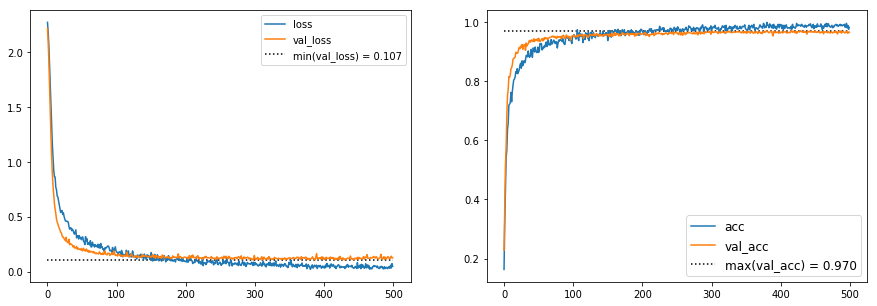

In [40]:
histplot(history)

Data augmentation reduced number of misclassifications by half.